Looking at the bed files generated by the gwf workflow_mask

In [1]:
%run ../scripts/notebook_settings.py

In [2]:
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")

Meta_sample dir

In [3]:
d={}
d_f={}
for s in meta_data_samples.Species.unique():
    s_meta = meta_data_samples.loc[meta_data_samples.Species==s]
    all_list = []
    f_list = []
    if s == "gelada":
        continue
    for i, row in s_meta.iterrows():
        if row.PGDP_ID.startswith("PD"):
            all_list.append(row.PGDP_ID)
            if row.Sex == "F":
                f_list.append(row.PGDP_ID)
    if s == 'ursinus (grayfoot)':
        s = 'ursinus'
    d[s] = all_list
    d_f[s] = f_list
    print(s, len(all_list))

cynocephalus 60
anubis 92
kindae 25
hamadryas 24
papio 12
ursinus 4


In [4]:
chromosomes = ['chr{}'.format(x) for x in range(1, 21)] + ['chrX']
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/{}"
chrom_lengths = {}
for chrom in chromosomes:
    callset = zarr.open_group(zarr_dir.format(chrom), mode="r")
    chrom_lengths[chrom] = callset["variants/POS"][-1]
chrom_lengths

{'chr1': 217458862,
 'chr2': 188283571,
 'chr3': 181338496,
 'chr4': 166074342,
 'chr5': 183742160,
 'chr6': 175397042,
 'chr7': 162898541,
 'chr8': 140346570,
 'chr9': 125784620,
 'chr10': 91329658,
 'chr11': 132960390,
 'chr12': 128289583,
 'chr13': 104990022,
 'chr14': 124512263,
 'chr15': 108045186,
 'chr16': 74961076,
 'chr17': 91397701,
 'chr18': 72525974,
 'chr19': 51387235,
 'chr20': 72048358,
 'chrX': 143691566}

In [5]:
#Only taking 2 individuals per species.
IDs = []

for s in meta_data_samples.Species.unique():
    print(s)
    if s == "gelada":
        continue
    cluster_IDs = meta_data_samples.loc[(meta_data_samples.Species == s)
                                        & (meta_data_samples.Sex == "F")]
    n = 1
    if len(cluster_IDs) > 0:
        IDs.extend(np.random.choice(cluster_IDs.PGDP_ID.values, n, replace=False))
    cluster_IDs = meta_data_samples.loc[(meta_data_samples.Species == s)
                                        & (meta_data_samples.Sex == "M")]
    if len(cluster_IDs) > 0:
        IDs.extend(np.random.choice(cluster_IDs.PGDP_ID.values, n, replace=False))
IDs

cynocephalus
anubis
kindae
gelada
hamadryas
papio
ursinus (grayfoot)


['PD_0774',
 'PD_0747',
 'PD_0651',
 'PD_0494',
 '34474',
 'PD_0750',
 'PD_0708',
 'PD_0709',
 'PD_0392',
 'PD_0396',
 'PD_0695',
 'PD_0692']

Chromlengths

In [6]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chr3"

In [7]:
callset = zarr.open_group(zarr_dir, mode="r")
callset["samples"][:]

array(['16066', '16098', '30877', '30977', '34449', '34474', '38168',
       '97074', '97124', 'PD_0067', 'PD_0199', 'PD_0200', 'PD_0201',
       'PD_0202', 'PD_0203', 'PD_0204', 'PD_0205', 'PD_0206', 'PD_0207',
       'PD_0208', 'PD_0209', 'PD_0210', 'PD_0211', 'PD_0212', 'PD_0213',
       'PD_0214', 'PD_0215', 'PD_0216', 'PD_0217', 'PD_0218', 'PD_0219',
       'PD_0220', 'PD_0221', 'PD_0222', 'PD_0223', 'PD_0224', 'PD_0225',
       'PD_0226', 'PD_0227', 'PD_0228', 'PD_0229', 'PD_0230', 'PD_0231',
       'PD_0232', 'PD_0233', 'PD_0234', 'PD_0235', 'PD_0236', 'PD_0237',
       'PD_0238', 'PD_0239', 'PD_0240', 'PD_0241', 'PD_0242', 'PD_0243',
       'PD_0244', 'PD_0265', 'PD_0266', 'PD_0267', 'PD_0268', 'PD_0269',
       'PD_0270', 'PD_0271', 'PD_0272', 'PD_0390', 'PD_0391', 'PD_0392',
       'PD_0393', 'PD_0394', 'PD_0395', 'PD_0396', 'PD_0397', 'PD_0398',
       'PD_0399', 'PD_0400', 'PD_0401', 'PD_0492', 'PD_0493', 'PD_0494',
       'PD_0495', 'PD_0496', 'PD_0497', 'PD_0498', 'PD_049

Getting the coverage for each ID

In [8]:
data_dir = "/home/eriks/primatediversity/people/erik/data/callmasks/"
s_list = []
percentage_cov = []
chr_list = []
ID_list = []
chromosomes = ['chr{}'.format(x) for x in range(1, 21)] + ['chrX']
for chrom in chromosomes:
    for s in d:
        for ID in d[s]:
            df = pd.read_csv(data_dir+"{}/{}_mask.bed".format(ID, chrom), sep='\t',
                             comment='t', header=None, names=["chrom", "chromStart", "chromEnd"])
            percentage_cov.append((df.chromEnd.sum()-df.chromStart.sum())/chrom_lengths[chrom])
            chr_list.append(chrom)
            s_list.append(s)
            ID_list.append(ID)
    print(chrom)
d_cov = {"species": s_list, "chrom": chr_list, "PGDP_ID": ID_list, "cov": percentage_cov}
coverage_df = pd.DataFrame(data=d_cov)

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chrX


In [9]:
pd.set_option("display.precision", 2)
coverage_df

,species,chrom,PGDP_ID,cov
0,cynocephalus,chr1,PD_0213,0.95
1,cynocephalus,chr1,PD_0214,0.95
2,cynocephalus,chr1,PD_0215,0.95
3,cynocephalus,chr1,PD_0216,0.95
4,cynocephalus,chr1,PD_0217,0.95
...,...,...,...,...
4552,papio,chrX,PD_0401,0.88
4553,ursinus,chrX,PD_0692,0.89
4554,ursinus,chrX,PD_0693,0.94
4555,ursinus,chrX,PD_0694,0.94


Plotting results

<AxesSubplot:xlabel='cov', ylabel='Count'>

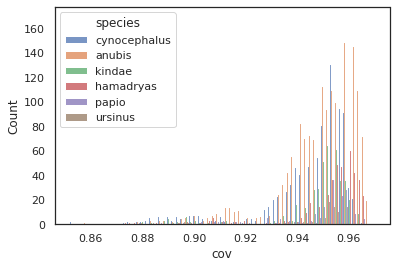

In [10]:
sns.histplot(coverage_df.loc[coverage_df["cov"] > 0.85], x="cov", hue="species", multiple="dodge")

[Text(0.5, 0, 'callability')]

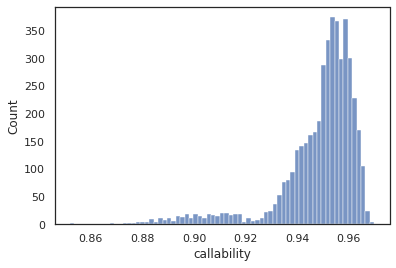

In [11]:
g = sns.histplot(coverage_df.loc[coverage_df["cov"] > 0.85], x="cov")
g.set(xlabel="callability")

In [12]:
coverage_df.loc[coverage_df["cov"] < 0.88]

,species,chrom,PGDP_ID,cov
3190,kindae,chr15,PD_0749,0.00
3201,kindae,chr15,PD_0781,0.00
3932,cynocephalus,chr19,PD_0637,0.88
3936,cynocephalus,chr19,PD_0687,0.88
3937,cynocephalus,chr19,PD_0688,0.88
3941,cynocephalus,chr19,PD_0745,0.87
3948,cynocephalus,chr19,PD_0755,0.81
3951,cynocephalus,chr19,PD_0761,0.87
3953,cynocephalus,chr19,PD_0763,0.85
3955,cynocephalus,chr19,PD_0765,0.88


<AxesSubplot:xlabel='cov', ylabel='Count'>

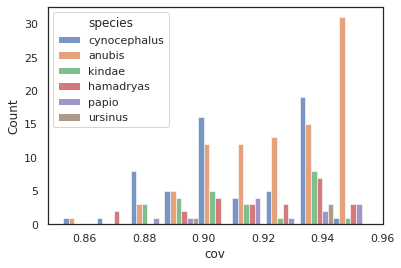

In [13]:
sns.histplot(coverage_df.loc[coverage_df.chrom=="chrX"], x="cov", hue="species", multiple="dodge")

In [14]:
male_IDs = meta_data_samples.loc[meta_data_samples.Sex=="M"].PGDP_ID.to_list()[3:]

<AxesSubplot:xlabel='cov', ylabel='Count'>

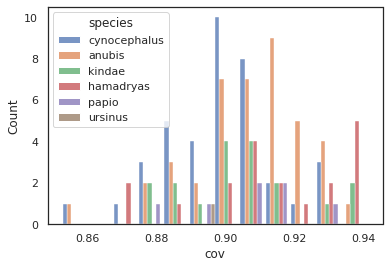

In [15]:
sns.histplot(coverage_df.loc[(coverage_df.chrom=="chrX") & (coverage_df.PGDP_ID.isin(male_IDs))],
             x="cov", hue="species", multiple="dodge")

<AxesSubplot:xlabel='cov', ylabel='Count'>

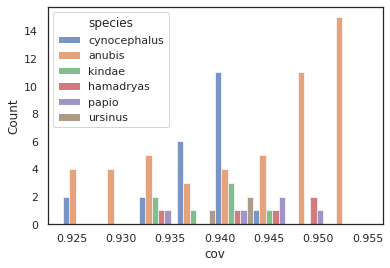

In [16]:
sns.histplot(coverage_df.loc[(coverage_df.chrom=="chrX") & (~coverage_df.PGDP_ID.isin(male_IDs))],
             x="cov", hue="species", multiple="dodge")

<AxesSubplot:xlabel='cov', ylabel='Count'>

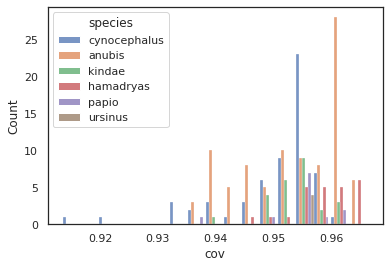

In [17]:
sns.histplot(coverage_df.loc[coverage_df.chrom=="chr7"], x="cov", hue="species", multiple="dodge")

Per individual stats

In [18]:
coverage_df["cov"].mean()

0.9478062330101666

Species and all baboon mask

In [19]:
s_list = []
percentage_cov = []
chr_list = []
chromosomes = ['chr{}'.format(x) for x in range(1, 21)] + ['chrX']
for chrom in chromosomes:
    for s in d:
        df = pd.read_csv(data_dir+"{}_{}_merged.bed".format(s, chrom), sep='\t',
                         comment='t', header=None, names=["chrom", "chromStart", "chromEnd"])
        percentage_cov.append((df.chromEnd.sum()-df.chromStart.sum())/chrom_lengths[chrom])
        chr_list.append(chrom)
        s_list.append(s)
    print(chrom)
d_cov = {"species": s_list, "chrom": chr_list, "cov": percentage_cov}
coverage_df_merged = pd.DataFrame(data=d_cov)

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chrX


In [20]:
coverage_df_merged["cov"].mean()

0.9242937560060567

<AxesSubplot:xlabel='cov', ylabel='Count'>

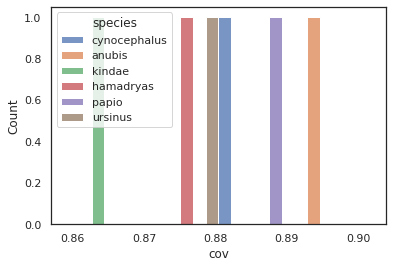

In [21]:
sns.histplot(coverage_df_merged.loc[coverage_df_merged.chrom=="chrX"], x="cov", hue="species", multiple="dodge")

<AxesSubplot:xlabel='cov', ylabel='Count'>

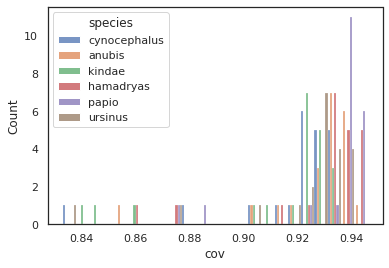

In [22]:
sns.histplot(coverage_df_merged, x="cov", hue="species", multiple="dodge")

In [23]:
coverage_df_merged.loc[coverage_df_merged["cov"] < 0.9]

,species,chrom,cov
86,kindae,chr15,0.84
108,cynocephalus,chr19,0.83
109,anubis,chr19,0.86
110,kindae,chr19,0.84
111,hamadryas,chr19,0.86
112,papio,chr19,0.87
113,ursinus,chr19,0.84
120,cynocephalus,chrX,0.88
122,kindae,chrX,0.86
123,hamadryas,chrX,0.87


Further statistics, based on subset with different mask criteria.

In [24]:
name_subset =['PD_0271', 'PD_0768', 'PD_0222', 'PD_0508', 'PD_0789',
              'PD_0793','PD_0708', 'PD_0718', 'PD_0390', 'PD_0401', 'PD_0695', 'PD_0692']

In [25]:
data_dir = "/home/eriks/primatediversity/people/erik/data/callmasks/"
mask_type = ["only_GT_miss/", "min_het/", "min_cov/", "max_cov/", "gq/",
             "all_filter/", "min_cov_third/", "all_filter_third/"]
s_list = []
percentage_cov = []
chr_list = []
ID_list = []
mask_list = []
chromosomes = ['chr{}'.format(x) for x in range(1, 21)] + ['chrX']
for m in mask_type:
    for chrom in chromosomes:
        for ID in name_subset:
            df = pd.read_csv(data_dir+m+"{}/{}_mask.bed".format(ID, chrom), sep='\t',
                             comment='t', header=None, names=["chrom", "chromStart", "chromEnd"])
            percentage_cov.append((df.chromEnd.sum()-df.chromStart.sum())/chrom_lengths[chrom])
            chr_list.append(chrom)
            s_list.append(meta_data_samples.loc[meta_data_samples.PGDP_ID == ID].Species.values[0])
            ID_list.append(ID)
            if m == "only_GT_miss/":
                m_t = "(GT='./.')"
            else:
                m_t = m[:-1]
            mask_list.append(m_t)
    print(m)
d_cov = {"species": s_list, "chrom": chr_list, "PGDP_ID": ID_list, "cov": percentage_cov, "mask": mask_list}
coverage_df_mask_test = pd.DataFrame(data=d_cov)

only_GT_miss/
min_het/
min_cov/
max_cov/
gq/
all_filter/
min_cov_third/
all_filter_third/


In [26]:
coverage_df_mask_test.loc[coverage_df_mask_test["mask"] == "min_cov"]["cov"].mean()

0.9542187095329898

In [27]:
coverage_df_mask_test.loc[coverage_df_mask_test["mask"] == "min_cov_third"]["cov"].mean()

0.9683709063891877

<AxesSubplot:xlabel='cov', ylabel='Count'>

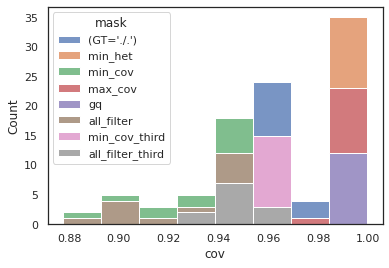

In [28]:
sns.histplot(coverage_df_mask_test.loc[coverage_df_mask_test["chrom"] == "chrX"],
             x="cov", hue="mask", multiple="stack")

<AxesSubplot:xlabel='cov', ylabel='Count'>

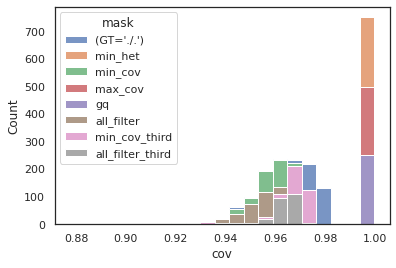

In [29]:
sns.histplot(coverage_df_mask_test,
             x="cov", hue="mask", multiple="stack")

<AxesSubplot:xlabel='mask', ylabel='cov'>

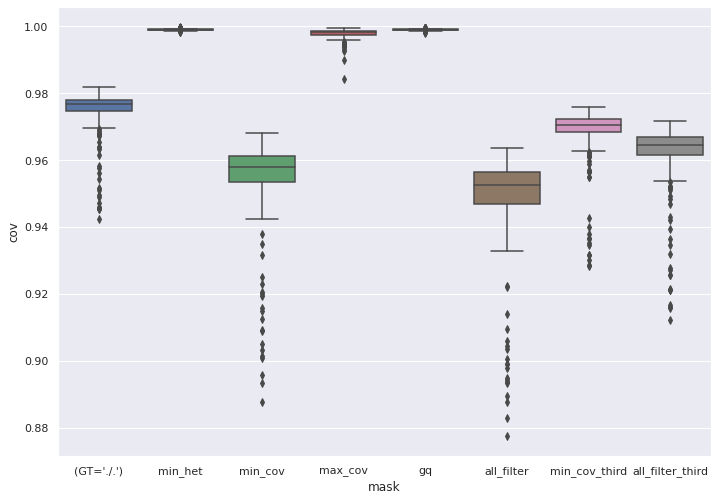

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="mask", y="cov", data=coverage_df_mask_test)

Text(0.5, 0, 'Species')

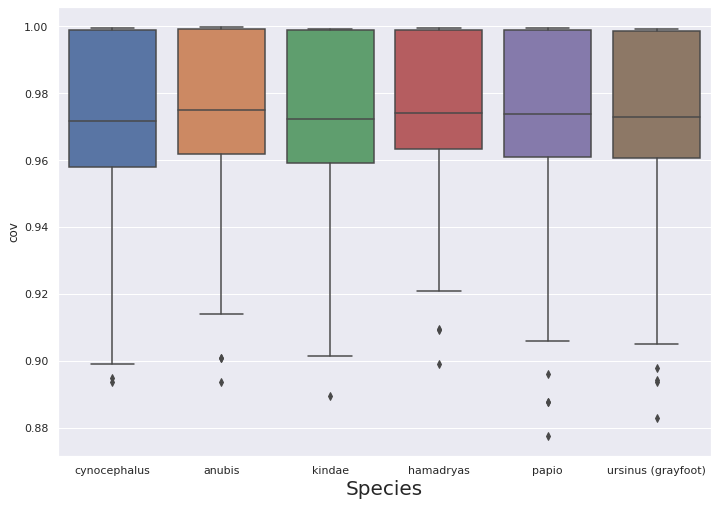

In [31]:
b = sns.boxplot(x="species", y="cov", data=coverage_df_mask_test)
b.set_xlabel("Species",fontsize=20)

In [32]:
pd.set_option("display.precision", 5)
coverage_df_mask_test.loc[(coverage_df_mask_test["chrom"] == "chrX")
                         & (coverage_df_mask_test["mask"] == "all_filter")]

,species,chrom,PGDP_ID,cov,mask
1500,cynocephalus,chrX,PD_0271,0.93939,all_filter
1501,cynocephalus,chrX,PD_0768,0.89908,all_filter
1502,anubis,chrX,PD_0222,0.94895,all_filter
1503,anubis,chrX,PD_0508,0.90072,all_filter
1504,kindae,chrX,PD_0789,0.93588,all_filter
1505,kindae,chrX,PD_0793,0.90454,all_filter
1506,hamadryas,chrX,PD_0708,0.94328,all_filter
1507,hamadryas,chrX,PD_0718,0.92201,all_filter
1508,papio,chrX,PD_0390,0.94394,all_filter
1509,papio,chrX,PD_0401,0.87758,all_filter


In [33]:
coverage_df_mask_test.loc[(coverage_df_mask_test["cov"] <= 0.91)]

,species,chrom,PGDP_ID,cov,mask
720,cynocephalus,chr19,PD_0271,0.90339,min_cov
723,anubis,chr19,PD_0508,0.90074,min_cov
724,kindae,chr19,PD_0789,0.90149,min_cov
726,hamadryas,chr19,PD_0708,0.90926,min_cov
729,papio,chr19,PD_0401,0.89592,min_cov
730,ursinus (grayfoot),chr19,PD_0695,0.90908,min_cov
731,ursinus (grayfoot),chr19,PD_0692,0.89353,min_cov
753,papio,chrX,PD_0401,0.88761,min_cov
755,ursinus (grayfoot),chrX,PD_0692,0.90513,min_cov
1476,cynocephalus,chr19,PD_0271,0.89354,all_filter


In [34]:
#Napkin math to estimate whether filters other than min_cov max_cov matter
(1-(1-0.94448)-(1-0.99834))-0.93939 #0.34 % are not masked due to cov, while
((1-0.94448)-(1-0.99834)) # 5,38 % are masked due to cov.

0.05386000000000002

In [35]:
# Average across individuals
min_cov = coverage_df_mask_test.loc[(coverage_df_mask_test["mask"] == "min_cov")]["cov"].values
max_cov = coverage_df_mask_test.loc[(coverage_df_mask_test["mask"] == "max_cov")]["cov"].values
total_cov = coverage_df_mask_test.loc[(coverage_df_mask_test["mask"] == "all_filter")]["cov"].values
((max_cov-(1-min_cov))-total_cov).mean()

0.003890173346342374

In [36]:
print(1-(max_cov-(1-min_cov)).mean(), ((max_cov-(1-min_cov))-total_cov).mean())

0.0478662426134403 0.003890173346342374


Calculate cov differences for each cutoff

In [37]:
data_dir = "/home/eriks/primatediversity/people/erik/data/callmasks/"
percentage_list = [50, 20, 15, 10, 5, 2.5, 1, 0.5, 0]
s_list = []
percentage_cov = []
chr_list = []
ID_list = []
p_list = []
chromosomes = ['chr{}'.format(x) for x in range(1, 21)] + ['chrX']
for p in percentage_list:
    for chrom in chromosomes:
        df = pd.read_csv(data_dir+"cutoff_{}_all_baboons_{}_min_half_merged.bed".format(p, chrom), sep='\t',
                         comment='t', header=None, names=["chrom", "chromStart", "chromEnd"])
        if chrom == "chrX":
            df = pd.read_csv(data_dir+"cutoff_{}_all_baboons_{}_f_only_min_half_merged.bed".format(p, chrom), sep='\t',
                         comment='t', header=None, names=["chrom", "chromStart", "chromEnd"])
        percentage_cov.append((df.chromEnd.sum()-df.chromStart.sum())/chrom_lengths[chrom])
        chr_list.append(chrom)
        p_list.append(p)
    print(p)
d_cov = {"chrom": chr_list, "cov": percentage_cov, "percentage": p_list}
coverage_df_mask_test = pd.DataFrame(data=d_cov)

50
20
15
10
5
2.5
1
0.5
0


<AxesSubplot:xlabel='percentage', ylabel='cov'>

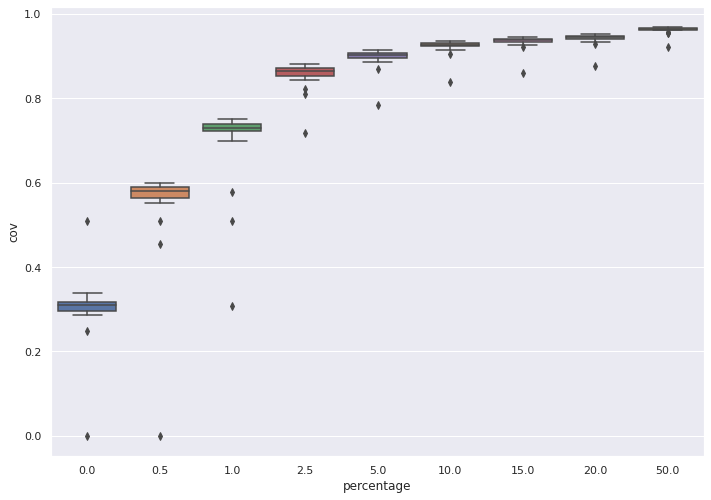

In [38]:
sns.boxplot(x="percentage", y="cov", data=coverage_df_mask_test)

<AxesSubplot:xlabel='percentage', ylabel='cov'>

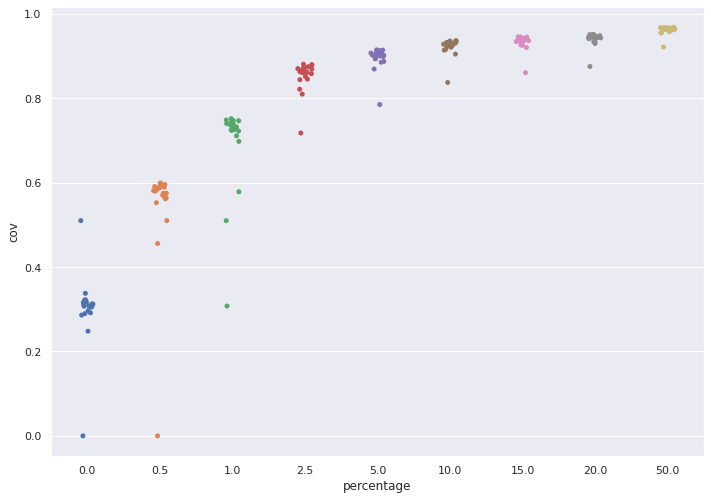

In [39]:
sns.stripplot(x="percentage", y="cov", data=coverage_df_mask_test)
#sns.violinplot(x="percentage", y="cov", data=coverage_df_mask_test)

<AxesSubplot:xlabel='percentage', ylabel='cov'>

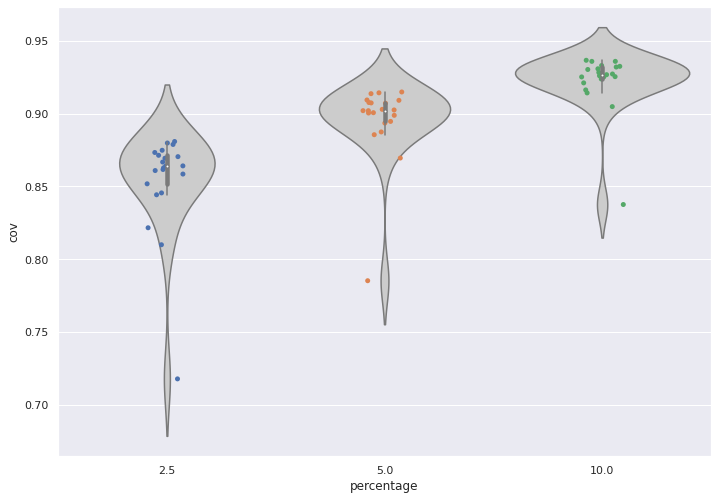

In [40]:
candidates = coverage_df_mask_test.loc[(coverage_df_mask_test.percentage > 1)
                                      & (coverage_df_mask_test.percentage < 15)]
sns.violinplot(x="percentage", y="cov", color="0.8", zorder=1, data=candidates)
sns.stripplot(x="percentage", y="cov", zorder=1, data=candidates)

In [41]:
coverage_df_mask_test.groupby(["percentage"]).mean()

,cov
percentage,
0.0,0.30169
0.5,0.54355
1.0,0.69426
2.5,0.85372
5.0,0.89567
10.0,0.92235
15.0,0.93364
20.0,0.94079
50.0,0.96169


Have updated the individuals that chrX is based on to only be the females. There are less than 100, so the lowest percentages dont really matter.

In [42]:
data_dir = "/home/eriks/primatediversity/people/erik/data/callmasks/"
percentage_list = [50, 20, 15, 10, 5, 2.5, 1, 0.5, 0]
s_list = []
percentage_cov = []
chr_list = []
ID_list = []
p_list = []
chromosomes = ['chr{}'.format(x) for x in range(1, 21)] + ['chrX']
for p in percentage_list:
    for chrom in chromosomes:
        df = pd.read_csv(data_dir+"cutoff_{}_all_baboons_{}_min_third_merged.bed".format(p, chrom), sep='\t',
                         comment='t', header=None, names=["chrom", "chromStart", "chromEnd"])
        if chrom == "chrX":
            df = pd.read_csv(data_dir+"cutoff_{}_all_baboons_{}_f_only_min_third_merged.bed".format(p, chrom), sep='\t',
                         comment='t', header=None, names=["chrom", "chromStart", "chromEnd"])
        percentage_cov.append((df.chromEnd.sum()-df.chromStart.sum())/chrom_lengths[chrom])
        chr_list.append(chrom)
        p_list.append(p)
    print(p)
d_cov = {"chrom": chr_list, "cov": percentage_cov, "percentage": p_list}
coverage_df_mask_test = pd.DataFrame(data=d_cov)

50
20
15
10
5
2.5
1
0.5
0


In [43]:
coverage_df_mask_test.loc[coverage_df_mask_test.percentage==5.0]["cov"].mean()

0.9237570049977164

<AxesSubplot:xlabel='percentage', ylabel='cov'>

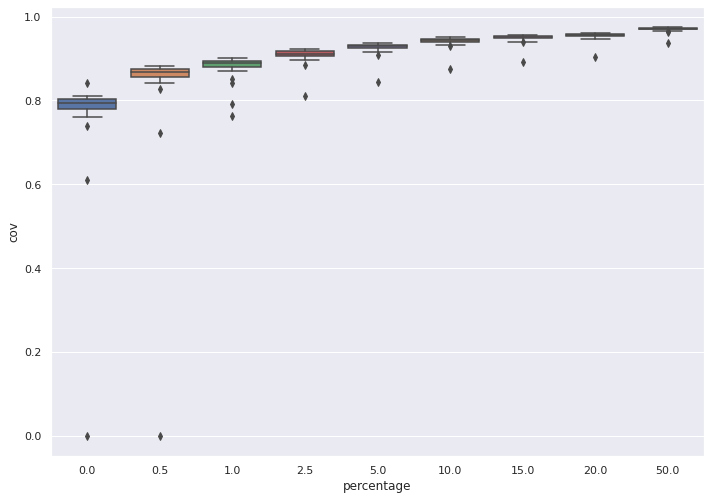

In [44]:
sns.boxplot(x="percentage", y="cov", data=coverage_df_mask_test)

<AxesSubplot:xlabel='percentage', ylabel='cov'>

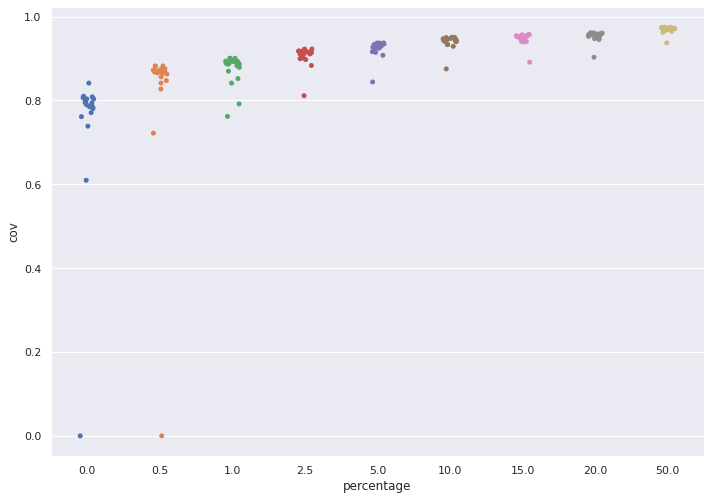

In [45]:
sns.stripplot(x="percentage", y="cov", data=coverage_df_mask_test)

In [46]:
coverage_df_mask_test.loc[coverage_df_mask_test["percentage"] == 5.0]

,chrom,cov,percentage
84,chr1,0.92909,5.0
85,chr2,0.93686,5.0
86,chr3,0.92672,5.0
87,chr4,0.93317,5.0
88,chr5,0.93138,5.0
89,chr6,0.93132,5.0
90,chr7,0.92988,5.0
91,chr8,0.93362,5.0
92,chr9,0.92717,5.0
93,chr10,0.91614,5.0


In [47]:
pd.set_option("display.precision", 4)
coverage_df_mask_test.groupby(["percentage"]).mean()

,cov
percentage,
0.0,0.7458
0.5,0.8181
1.0,0.8751
2.5,0.9062
5.0,0.9238
10.0,0.9398
15.0,0.9476
20.0,0.9529
50.0,0.9691


Histogram of mode of coverage.

In [48]:
data_dir = "/home/eriks/primatediversity/people/erik/steps/depth_stats/"
s_list = []
mod_cov = []
chr_list = []
ID_list = []
chromosomes = ['chr{}'.format(x) for x in range(1, 21)] + ['chrX']
for chrom in chromosomes:
    for s in d:
        for ID in d[s]:
            df = pd.read_csv(data_dir+"{}_{}_modcov.txt".format(ID, chrom), sep='\t', names=["modcov"])
            if len(df) > 0:
                mod_cov.append(df["modcov"].values[0])
                chr_list.append(chrom)
                s_list.append(s)
                ID_list.append(ID)
    print(chrom)
d_cov = {"chrom": chr_list, "mod_cov": mod_cov, "species": s_list, "PGDP_ID": ID_list}
coverage_df_modcov = pd.DataFrame(data=d_cov)

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chrX


<AxesSubplot:xlabel='mod_cov', ylabel='Count'>

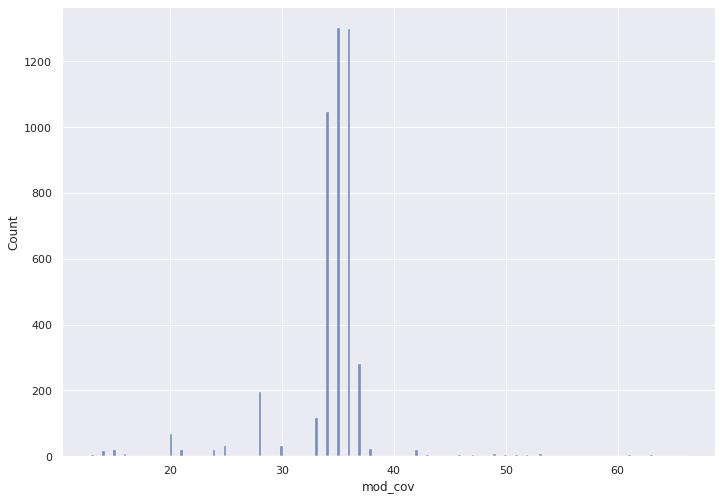

In [49]:
sns.histplot(coverage_df_modcov, x="mod_cov")

In [50]:
coverage_df_modcov.loc[(coverage_df_modcov["mod_cov"] > 50) & (coverage_df_modcov["mod_cov"] < 70)]

,chrom,mod_cov,species,PGDP_ID
36,chr1,52,cynocephalus,PD_0746
190,chr1,60,hamadryas,PD_0709
253,chr2,54,cynocephalus,PD_0746
407,chr2,63,hamadryas,PD_0709
470,chr3,52,cynocephalus,PD_0746
624,chr3,64,hamadryas,PD_0709
687,chr4,53,cynocephalus,PD_0746
841,chr4,63,hamadryas,PD_0709
904,chr5,53,cynocephalus,PD_0746
1058,chr5,66,hamadryas,PD_0709


In [51]:
coverage_df_modcov.loc[coverage_df_modcov["mod_cov"] < 20]

,chrom,mod_cov,species,PGDP_ID
4343,chrX,14,cynocephalus,PD_0223
4364,chrX,14,cynocephalus,PD_0637
4365,chrX,15,cynocephalus,PD_0658
4368,chrX,14,cynocephalus,PD_0687
4369,chrX,14,cynocephalus,PD_0688
4370,chrX,14,cynocephalus,PD_0689
4371,chrX,15,cynocephalus,PD_0690
4372,chrX,15,cynocephalus,PD_0691
4375,chrX,13,cynocephalus,PD_0747
4376,chrX,14,cynocephalus,PD_0748


<AxesSubplot:xlabel='mod_cov', ylabel='Count'>

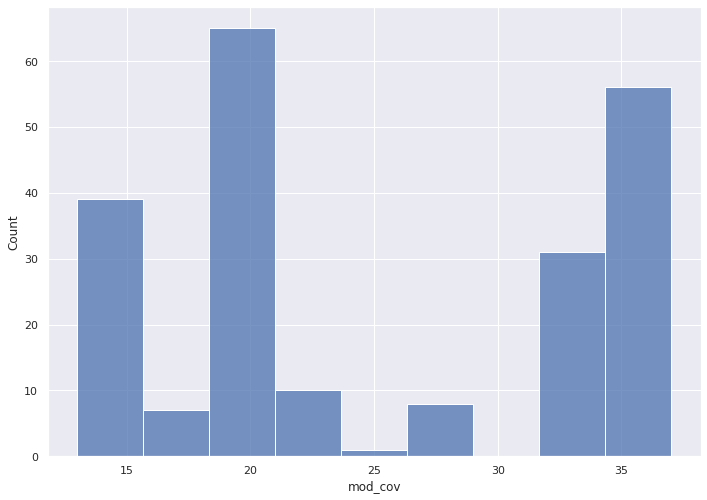

In [52]:
sns.histplot(coverage_df_modcov.loc[coverage_df_modcov.chrom == "chrX"],
             x="mod_cov")

<AxesSubplot:xlabel='mod_cov', ylabel='Count'>

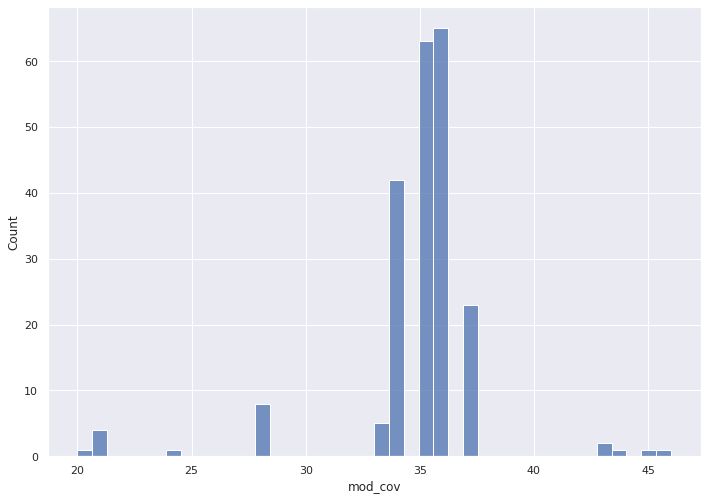

In [53]:
sns.histplot(coverage_df_modcov.loc[coverage_df_modcov.chrom == "chr19"],
             x="mod_cov")

<AxesSubplot:xlabel='mod_cov', ylabel='Count'>

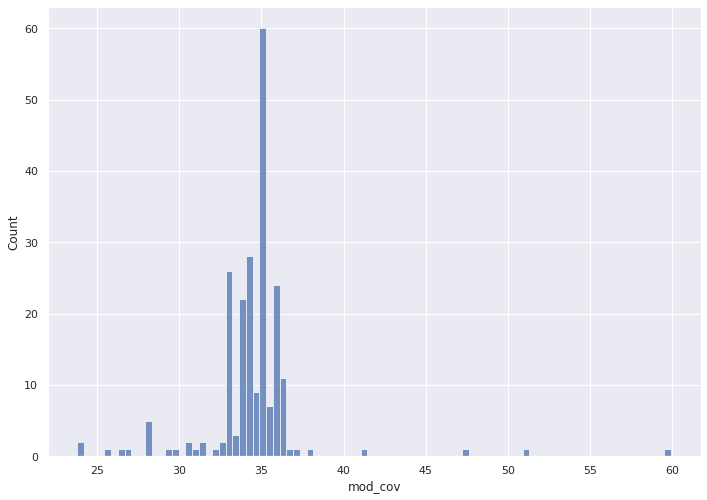

In [54]:
sns.histplot(coverage_df_modcov.groupby(["PGDP_ID"]).mean(), x="mod_cov")

In [55]:
coverage_df_modcov.groupby(["PGDP_ID"]).mean()[:10]

,mod_cov
PGDP_ID,
PD_0199,36.0000
PD_0200,35.7619
PD_0201,32.7619
PD_0202,34.6190
PD_0203,28.0000
PD_0204,33.0952
PD_0205,34.9524
PD_0206,35.0952
PD_0207,34.8095


Checking up on a depth distribution (chr2 from PD_0244)

In [56]:
depth_path = "/faststorage/project/primatediversity/people/erik/PD_0244_depth.txt"

In [57]:
depth_table = pd.read_table(depth_path)
depth_table

,DP,id,bin,number of genotypes,fraction of genotypes (%),number of sites,fraction of sites (%)
0,DP,0,1,0,0.0,866,0.1031
1,DP,0,2,0,0.0,1954,0.2326
2,DP,0,3,0,0.0,2467,0.2937
3,DP,0,4,0,0.0,2600,0.3095
4,DP,0,5,0,0.0,2925,0.3482
...,...,...,...,...,...,...,...
173,DP,0,284,0,0.0,2,0.0002
174,DP,0,313,0,0.0,1,0.0001
175,DP,0,340,0,0.0,1,0.0001
176,DP,0,367,0,0.0,1,0.0001


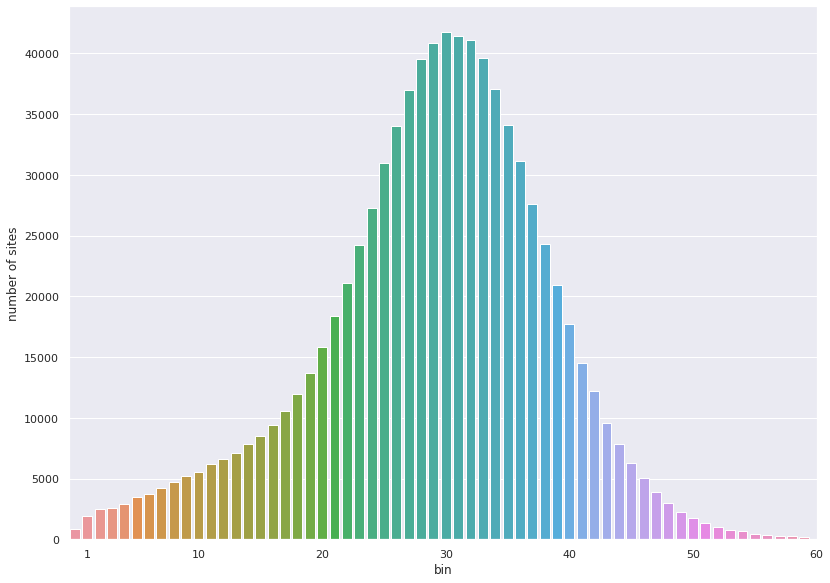

In [58]:
ax = sns.barplot(data=depth_table[:60], x="bin", y="number of sites")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=5)
l = [1, 10, 20, 30, 40, 50, 60]
ax.set(xticks=l, xticklabels=l)
plt.tight_layout()
plt.show()

ChrX when using all individuals and female only

In [59]:
path = "cutoff_1_all_baboons_chrX_f_only_min_third_merged.bed"
data_dir = "/home/eriks/primatediversity/people/erik/data/callmasks/"
s_list = []
percentage_cov = []
ID_list = []
sex_list = []
for s in d:
    for ID in d[s]:
        df = pd.read_csv(data_dir+"{}/chrX_mask.bed".format(ID), sep='\t',
                         comment='t', header=None, names=["chrom", "chromStart", "chromEnd"])
        percentage_cov.append((df.chromEnd.sum()-df.chromStart.sum())/chrom_lengths[chrom])
        sex_list.append(meta_data_samples.loc[meta_data_samples.PGDP_ID == ID].Sex.values[0])
        s_list.append(s)
        ID_list.append(ID)
d_cov = {"species": s_list, "Sex": sex_list, "PGDP_ID": ID_list, "cov": percentage_cov}
coverage_df_chrX = pd.DataFrame(data=d_cov)

In [60]:
coverage_df_chrX.loc[coverage_df_chrX.Sex == "F"]["cov"].mean()

0.9421819669661237

In [61]:
coverage_df_chrX

,species,Sex,PGDP_ID,cov
0,cynocephalus,F,PD_0213,0.9404
1,cynocephalus,F,PD_0214,0.9427
2,cynocephalus,M,PD_0215,0.8742
3,cynocephalus,F,PD_0216,0.9425
4,cynocephalus,M,PD_0217,0.8914
...,...,...,...,...
212,papio,M,PD_0401,0.8776
213,ursinus,M,PD_0692,0.8942
214,ursinus,F,PD_0693,0.9386
215,ursinus,F,PD_0694,0.9405


In [62]:
coverage_df_chrX.loc[coverage_df_chrX.Sex == "M"]["cov"].mean()

0.905526022493251

In [63]:
data_dir = "/home/eriks/primatediversity/people/erik/data/callmasks/"
s_list = []
percentage_cov = []
ID_list = []
sex_list = []
for s in d:
    for ID in d[s]:
        df = pd.read_csv(data_dir+"{}/chrX_mask_third.bed".format(ID), sep='\t',
                         comment='t', header=None, names=["chrom", "chromStart", "chromEnd"])
        percentage_cov.append((df.chromEnd.sum()-df.chromStart.sum())/chrom_lengths[chrom])
        sex_list.append(meta_data_samples.loc[meta_data_samples.PGDP_ID == ID].Sex.values[0])
        s_list.append(s)
        ID_list.append(ID)
d_cov = {"species": s_list, "Sex": sex_list, "PGDP_ID": ID_list, "cov": percentage_cov}
coverage_df_chrX = pd.DataFrame(data=d_cov)

In [64]:
coverage_df_chrX.loc[coverage_df_chrX.Sex == "F"]["cov"].mean()

0.9561393689352592

In [65]:
coverage_df_chrX.loc[coverage_df_chrX.Sex == "M"]["cov"].mean()

0.9397894536022184